# 📊 Part 7: Seaborn Univariate Histograms (Mapping from Matplotlib Part 2)

**Goal:** Master the creation and customization of histograms using `seaborn.histplot` to visualize the underlying probability distribution of numerical data, focusing on Seaborn's integration with Pandas and categorical comparisons using `hue`.

---

### Key Learning Objectives (Mapping from Matplotlib)
1.  Understand the impact of **bin size** (`bins` parameter in `sns.histplot`).
2.  Customize histogram appearance using `color`, transparency (`alpha`), and `edgecolor`.
3.  Compare distributions (e.g., Male vs. Female) using **overlapping histograms** (via `hue` or manual plotting) and **subplots**.
4.  Apply advanced features: **density** (`stat='density'`), **cumulative** (`cumulative=True`), and **orientation** (`y=` instead of `x=`).

---


In [4]:
# Assuming these were run in a previous cell or notebook
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib

pd.set_option('display.max_columns', None)
pd.set_option('display.precision', 2)

sns.set_theme(style="ticks") 

titanic_data = pd.DataFrame({
    'Age': [22, 38, 26, 35, 35, 54, 2, 27, 14, 4, 58, 20, 39, 14, 55, 2,
             31, 25, 8, 19, 40, 66, 28, 42, 21, 18, 14, 40, 27, 3],
    'Sex': ['male', 'female', 'female', 'female', 'male', 'male', 'male',
             'male', 'female', 'female', 'male', 'male', 'female', 'female',
             'male', 'female', 'male', 'female', 'female', 'female', 'female',
             'male', 'female', 'male', 'female', 'female', 'female', 'male',
             'male', 'female'],
    'Survived': [0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0,
                  1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1]
})

print("✅ Libraries imported and data loaded.")
print("🎯 Starting Seaborn histogram analysis (Part 7)...")


✅ Libraries imported and data loaded.
🎯 Starting Seaborn histogram analysis (Part 7)...


## 1. Bin Size Experimentation (with `seaborn.histplot`)

Histograms group data into bins (intervals). Seaborn's `sns.histplot` also uses a `bins` parameter. Just like Matplotlib, the number of bins significantly affects how the distribution looks. Seaborn often has good default bin selection methods (like the Freedman-Diaconis rule), but manual adjustment is useful.

🎯 Experimenting with different bin sizes using sns.histplot...


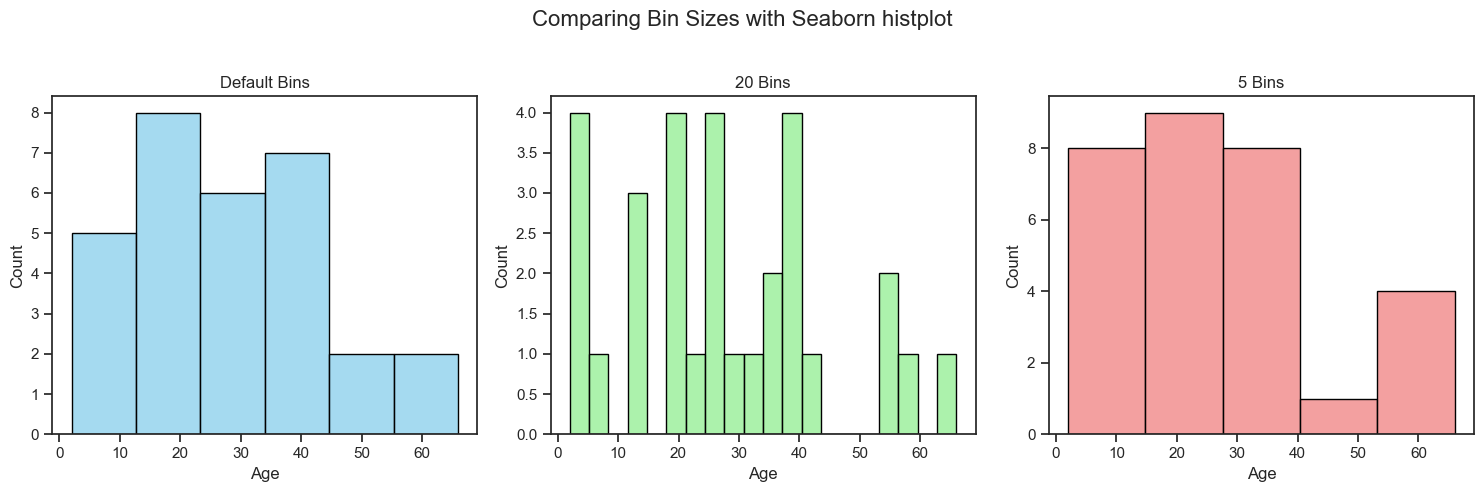


📚 Key Learning (same as Matplotlib):
• Fewer bins = Smoother, but can hide details.
• More bins = More detail, but can look noisy.
• Seaborn's default often provides a reasonable starting point.


In [5]:
# Assuming titanic_data DataFrame is loaded from the previous notebook cell

print("🎯 Experimenting with different bin sizes using sns.histplot...")

# Create subplots using Matplotlib to compare different bin sizes
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Comparing Bin Sizes with Seaborn histplot', fontsize=16)

# Default bins (Seaborn's automatic selection)
sns.histplot(data=titanic_data, x='Age', ax=axes[0], color='skyblue', edgecolor='black')
axes[0].set_title('Default Bins')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Count')

# 20 bins (more granular)
sns.histplot(data=titanic_data, x='Age', bins=20, ax=axes[1], color='lightgreen', edgecolor='black')
axes[1].set_title('20 Bins')
axes[1].set_xlabel('Age')

# 5 bins (very coarse)
sns.histplot(data=titanic_data, x='Age', bins=5, ax=axes[2], color='lightcoral', edgecolor='black')
axes[2].set_title('5 Bins')
axes[2].set_xlabel('Age')

plt.tight_layout(rect=[0, 0, 1, 0.96]) # Adjust for suptitle
plt.show()

print("\n📚 Key Learning (same as Matplotlib):")
print("• Fewer bins = Smoother, but can hide details.")
print("• More bins = More detail, but can look noisy.")
print("• Seaborn's default often provides a reasonable starting point.")

## 2. Customizing Histogram Appearance

`sns.histplot` accepts aesthetic arguments like `color`, `alpha` (transparency), and `edgecolor` directly. Using `alpha` is key for overlapping histograms.


🎯 Customizing histogram appearance with sns.histplot...


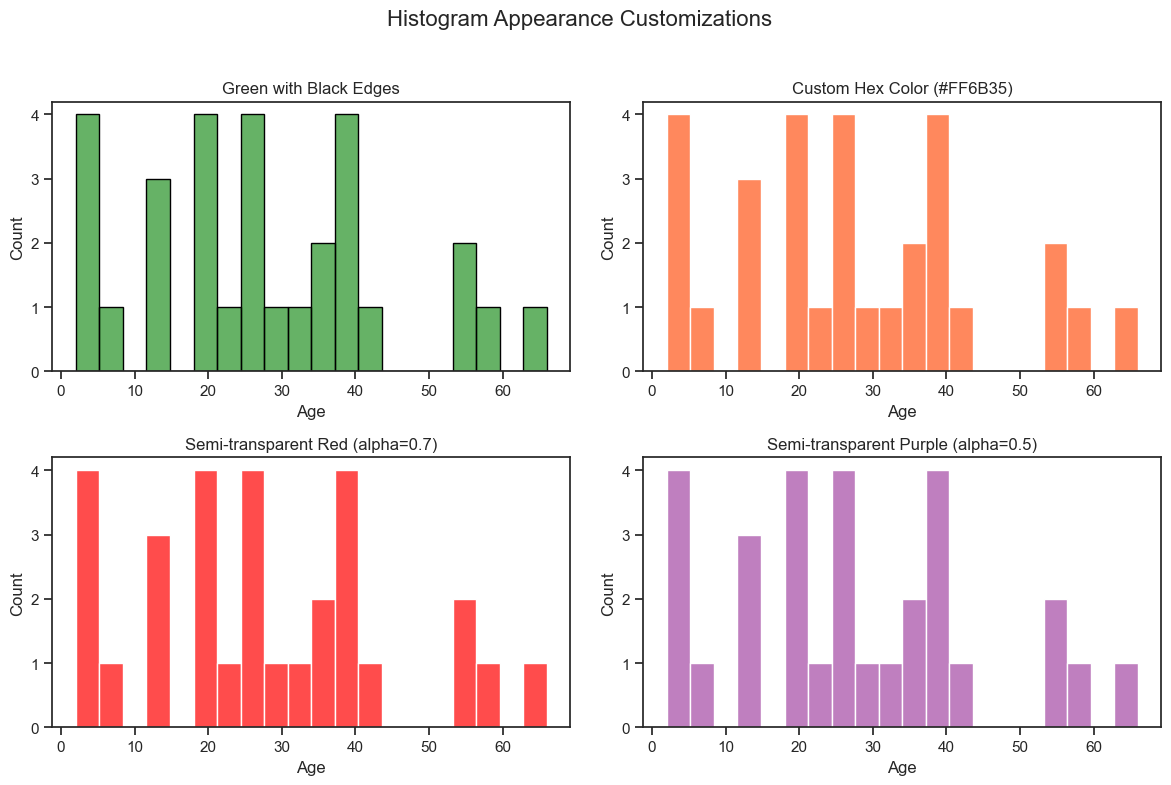


🎨 Customization options work similarly to Matplotlib's hist:
• `color`: Specifies the bar color.
• `alpha`: Controls transparency (0.0 to 1.0).
• `edgecolor`: Sets the color of bar borders.


In [6]:
print("\n🎯 Customizing histogram appearance with sns.histplot...")

fig, axes = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle('Histogram Appearance Customizations', fontsize=16)

# Subplot 1: With edge color
sns.histplot(data=titanic_data, x='Age', bins=20, color='green', alpha=0.6, edgecolor='black', ax=axes[0, 0])
axes[0, 0].set_title('Green with Black Edges')
axes[0, 0].set_xlabel('Age')
axes[0, 0].set_ylabel('Count')

# Subplot 2: Custom color using hex code
sns.histplot(data=titanic_data, x='Age', bins=20, color='#FF6B35', alpha=0.8, ax=axes[0, 1])
axes[0, 1].set_title('Custom Hex Color (#FF6B35)')
axes[0, 1].set_xlabel('Age')

# Subplot 3: With transparency (alpha)
sns.histplot(data=titanic_data, x='Age', bins=20, color='red', alpha=0.7, ax=axes[1, 0])
axes[1, 0].set_title('Semi-transparent Red (alpha=0.7)')
axes[1, 0].set_xlabel('Age')
axes[1, 0].set_ylabel('Count')

# Subplot 4: Different color and alpha
sns.histplot(data=titanic_data, x='Age', bins=20, color='purple', alpha=0.5, ax=axes[1, 1])
axes[1, 1].set_title('Semi-transparent Purple (alpha=0.5)')
axes[1, 1].set_xlabel('Age')


plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

print("\n🎨 Customization options work similarly to Matplotlib's hist:")
print("• `color`: Specifies the bar color.")
print("• `alpha`: Controls transparency (0.0 to 1.0).")
print("• `edgecolor`: Sets the color of bar borders.")

## 3. Comparing Distributions

Seaborn excels at comparing distributions across categories using the **`hue`** parameter within `sns.histplot`. This automatically creates overlapping histograms with appropriate labeling. You can also plot multiple histograms on the same Matplotlib Axes manually, using `alpha`.


🎯 Comparing age distributions by gender using Seaborn...


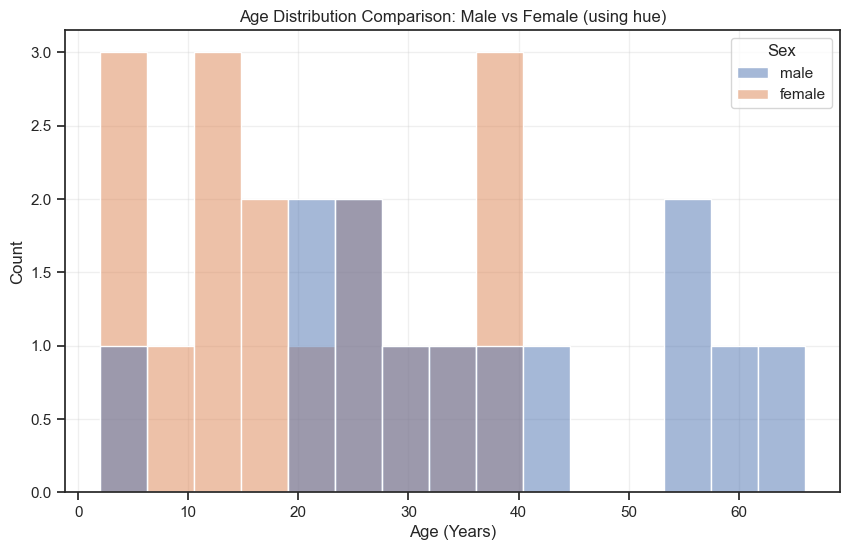

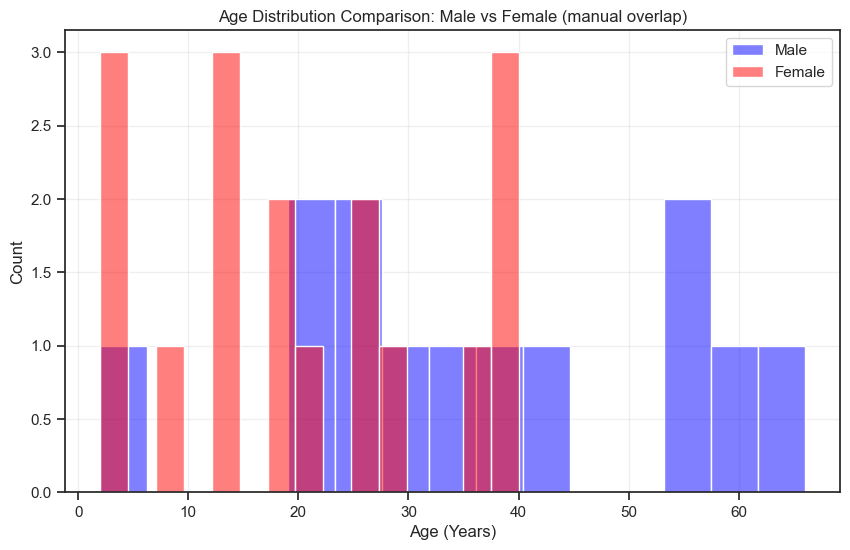


📊 Analysis (Data is illustrative):
• Male average age: 36.8 years
• Female average age: 20.5 years


In [7]:
print("\n🎯 Comparing age distributions by gender using Seaborn...")

# Method 1: Using 'hue' (Recommended Seaborn approach)
plt.figure(figsize=(10, 6))
sns.histplot(data=titanic_data, x='Age', hue='Sex', bins=15, alpha=0.5, multiple='layer', kde=False) # 'layer' overlaps them, kde adds density curve if True
plt.title('Age Distribution Comparison: Male vs Female (using hue)')
plt.xlabel('Age (Years)')
plt.ylabel('Count')
plt.grid(True, alpha=0.3)
plt.show()


# Method 2: Manually plotting on the same Axes (like Matplotlib)
male_ages = titanic_data[titanic_data['Sex'] == 'male']['Age']
female_ages = titanic_data[titanic_data['Sex'] == 'female']['Age']

plt.figure(figsize=(10, 6))
ax = sns.histplot(male_ages, bins=15, alpha=0.5, label='Male', color='blue') # Plot male data
sns.histplot(female_ages, bins=15, alpha=0.5, label='Female', color='red', ax=ax) # Plot female data on the SAME axes
ax.set_title('Age Distribution Comparison: Male vs Female (manual overlap)')
ax.set_xlabel('Age (Years)')
ax.set_ylabel('Count')
ax.legend()
plt.grid(True, alpha=0.3)
plt.show()

print("\n📊 Analysis (Data is illustrative):")
print(f"• Male average age: {male_ages.mean():.1f} years")
print(f"• Female average age: {female_ages.mean():.1f} years")

## 4. Advanced Histogram Features

`sns.histplot` offers parameters for different views:

* **`stat='density'`** or **`stat='probability'`**: Normalizes counts (equivalent to `density=True` in Matplotlib). `probability` makes heights sum to 1, `density` makes area sum to 1.
* **`cumulative=True`**: Shows running total.
* **`kde=True`**: Adds a Kernel Density Estimate curve.
* **`element='step'`**: Changes bars to step lines.
* **`multiple='stack'`**: Stacks bars instead of layering.
* **Plotting on `y` axis**: Simply switch `x='Age'` to `y='Age'`.


🎯 Exploring advanced features of sns.histplot...


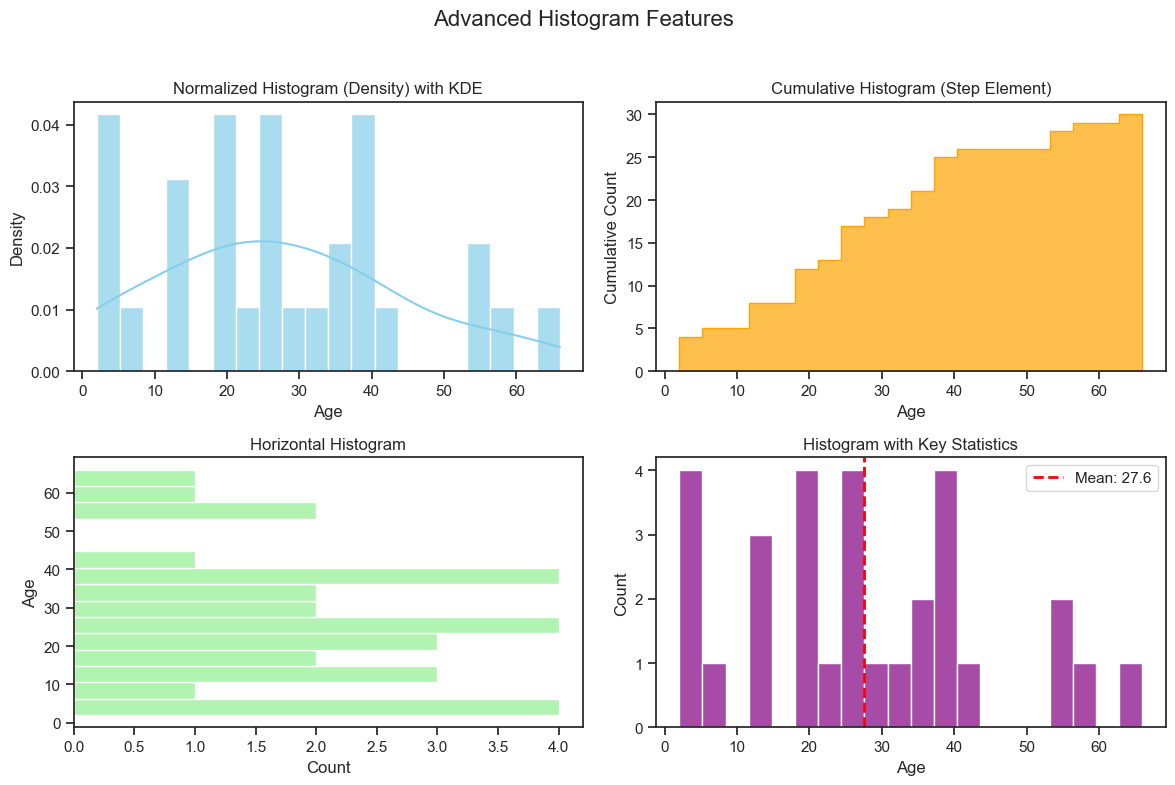

In [8]:
print("\n🎯 Exploring advanced features of sns.histplot...")

fig, axes = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle('Advanced Histogram Features', fontsize=16)

# Subplot 1: Density plot (Normalized) + KDE
sns.histplot(data=titanic_data, x='Age', bins=20, stat='density', color='skyblue', alpha=0.7, kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Normalized Histogram (Density) with KDE')
axes[0, 0].set_xlabel('Age')
axes[0, 0].set_ylabel('Density')

# Subplot 2: Cumulative histogram
sns.histplot(data=titanic_data, x='Age', bins=20, cumulative=True, color='orange', alpha=0.7, element='step', ax=axes[0, 1])
axes[0, 1].set_title('Cumulative Histogram (Step Element)')
axes[0, 1].set_xlabel('Age')
axes[0, 1].set_ylabel('Cumulative Count')

# Subplot 3: Horizontal histogram (using y=)
sns.histplot(data=titanic_data, y='Age', bins=15, color='lightgreen', alpha=0.7, ax=axes[1, 0])
axes[1, 0].set_title('Horizontal Histogram')
axes[1, 0].set_ylabel('Age')
axes[1, 0].set_xlabel('Count')

# Subplot 4: With statistics annotations (using Matplotlib's axvline)
sns.histplot(data=titanic_data, x='Age', bins=20, color='purple', alpha=0.7, ax=axes[1, 1])
axes[1, 1].set_title('Histogram with Key Statistics')
axes[1, 1].set_xlabel('Age')
axes[1, 1].set_ylabel('Count')

# Add statistical lines (using Matplotlib ax methods)
mean_age = titanic_data['Age'].mean()
axes[1, 1].axvline(mean_age, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_age:.1f}')
axes[1, 1].legend()

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

## 5. Practice Project: Complete Age Analysis Dashboard (Seaborn version)

Recreate the dashboard using `plt.subplots` and `sns.histplot`, leveraging `hue` where appropriate.


🎯 PRACTICE PROJECT: Complete Age Analysis Dashboard with Seaborn

💾 Dashboard saved as 'seaborn_part7_age_dashboard.png'


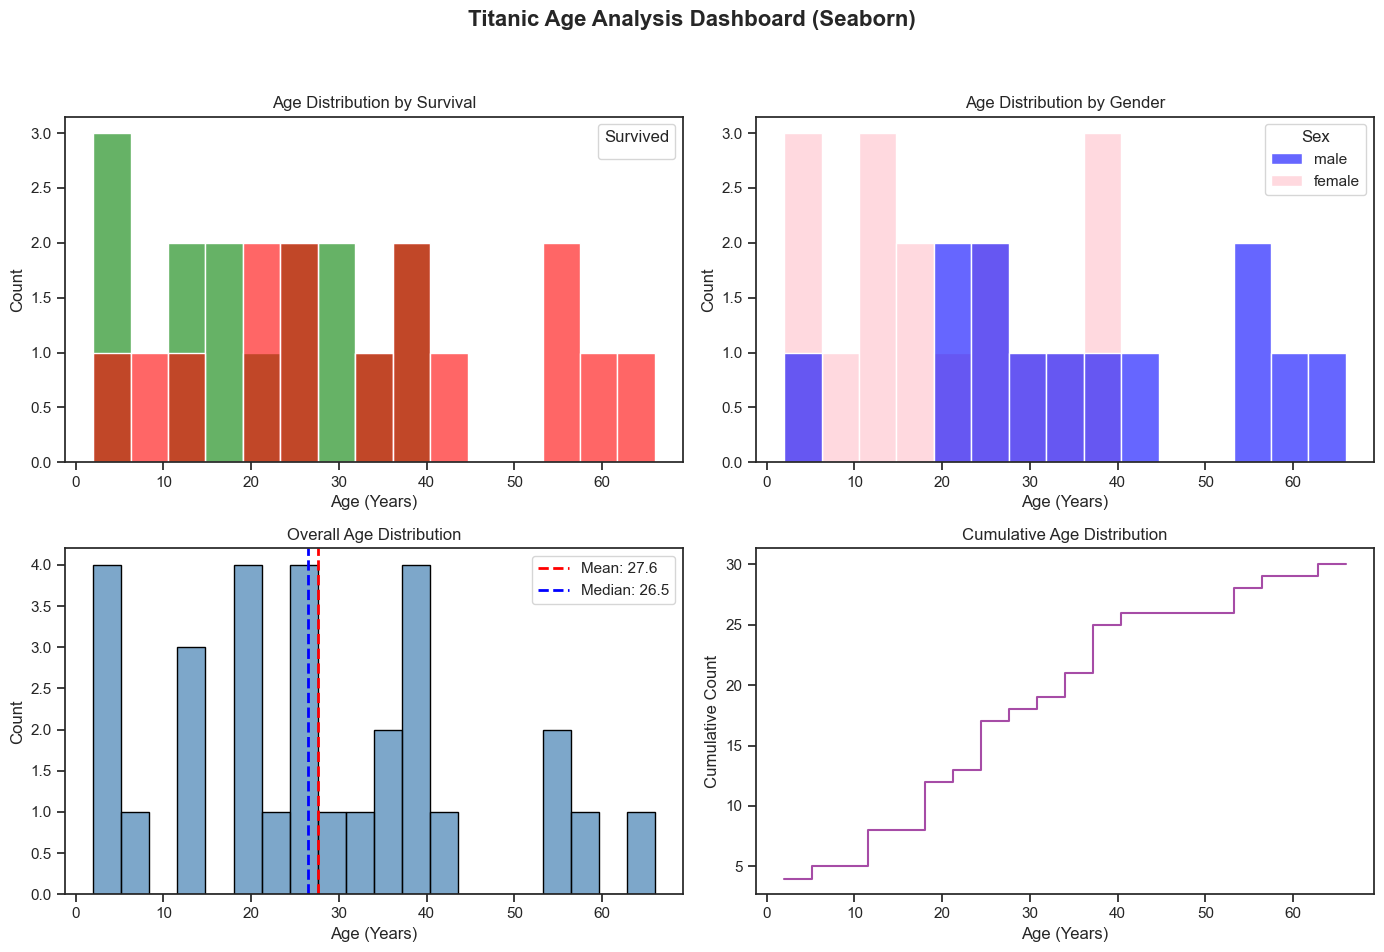


🎯 Seaborn Part 7 complete! Histograms mapped - ready for next steps!


In [9]:
print("\n🎯 PRACTICE PROJECT: Complete Age Analysis Dashboard with Seaborn")

# Data preparation (assuming titanic_data is loaded)
survivors_data = titanic_data # For hue='Survived'
gender_data = titanic_data    # For hue='Sex'
overall_data = titanic_data   # For overall distribution

# Create dashboard using Matplotlib subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Titanic Age Analysis Dashboard (Seaborn)', fontsize=16, fontweight='bold')

# Plot 1: Survival comparison using hue
sns.histplot(data=survivors_data, x='Age', hue='Survived', bins=15, alpha=0.6, multiple='layer', ax=axes[0, 0], palette={0:'red', 1:'green'})
axes[0, 0].set_title('Age Distribution by Survival')
axes[0, 0].set_xlabel('Age (Years)')
axes[0, 0].set_ylabel('Count')
# Manually adjust legend titles if needed (hue adds automatic legend)
handles, labels = axes[0, 0].get_legend_handles_labels()
axes[0, 0].legend(handles, ['Did not survive (0)', 'Survived (1)'], title='Survived')


# Plot 2: Gender comparison using hue
sns.histplot(data=gender_data, x='Age', hue='Sex', bins=15, alpha=0.6, multiple='layer', ax=axes[0, 1], palette={'male':'blue', 'female':'pink'})
axes[0, 1].set_title('Age Distribution by Gender')
axes[0, 1].set_xlabel('Age (Years)')
axes[0, 1].set_ylabel('Count')

# Plot 3: Overall distribution with mean/median (using sns.histplot + axvline)
sns.histplot(data=overall_data, x='Age', bins=20, color='steelblue', alpha=0.7, edgecolor='black', ax=axes[1, 0])
axes[1, 0].set_title('Overall Age Distribution')
axes[1, 0].set_xlabel('Age (Years)')
axes[1, 0].set_ylabel('Count')
mean_age = overall_data['Age'].mean()
median_age = overall_data['Age'].median()
axes[1, 0].axvline(mean_age, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_age:.1f}')
axes[1, 0].axvline(median_age, color='blue', linestyle='--', linewidth=2, label=f'Median: {median_age:.1f}')
axes[1, 0].legend()

# Plot 4: Cumulative Overall Distribution
sns.histplot(data=overall_data, x='Age', bins=20, cumulative=True, color='purple', alpha=0.7, element='step', fill=False, ax=axes[1, 1])
axes[1, 1].set_title('Cumulative Age Distribution')
axes[1, 1].set_xlabel('Age (Years)')
axes[1, 1].set_ylabel('Cumulative Count')


plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout

# Final export
plt.savefig('seaborn_part7_age_dashboard.png', dpi=300, bbox_inches='tight')
print("\n💾 Dashboard saved as 'seaborn_part7_age_dashboard.png'")
plt.show()

print("\n🎯 Seaborn Part 7 complete! Histograms mapped - ready for next steps!")

---

**Summary:** `seaborn.histplot` provides a high-level interface for creating informative histograms, integrating well with Pandas DataFrames and offering easy comparison using `hue`. Basic customization is similar to Matplotlib, and advanced features like density plots (`stat='density'`) and cumulative plots (`cumulative=True`) are built-in parameters. For complex layouts like dashboards, using Matplotlib's `subplots` combined with Seaborn's axes-level plotting (`ax=...`) remains a powerful technique.